In [272]:
#visualisation and file loading
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

#Text Preprocessing and NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import nltk
import re
import demoji #process emoji
from deep_translator import GoogleTranslator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import OneHotEncoder

#xgboost and other Random Forest
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

#Evaluation
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

import spacy
from spacy import displacy

In [107]:
NER = spacy.load("en_core_web_sm")
demoji.download_codes()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
sentiment = SentimentIntensityAnalyzer()

C:\Users\qiavo\anaconda3\lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
C:\Users\qiavo\AppData\Local\Temp\ipykernel_28512\989259425.py:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qiavo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\qiavo\AppData\Roaming\nlt

In [108]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
sample = pd.read_csv("sample_submission.csv")

In [110]:
def describe(file) :
    print(file.describe())
    print(file.dtypes)
    print(f'Shape: {file.shape}')
    
describe(train)
describe(test)
train

       favourites_count  followers_count  friends_count            id  \
count      26206.000000     2.620600e+04   2.620600e+04  2.620600e+04   
mean       12159.971342     3.732983e+05   4.427275e+03  1.253306e+17   
std        33628.948536     2.515996e+06   4.602204e+04  3.035728e+17   
min            0.000000     0.000000e+00   0.000000e+00  5.860000e+02   
25%          347.000000     3.400000e+01   3.400000e+01  9.799366e+07   
50%         2037.000000     3.540000e+02   2.920000e+02  3.997210e+08   
75%         8751.750000     8.241500e+03   8.780000e+02  2.480241e+09   
max       839929.000000     1.216415e+08   1.641962e+06  1.120974e+18   

       statuses_count  average_tweets_per_day  account_age_days        target  
count    2.620600e+04            26206.000000      26206.000000  26206.000000  
mean     2.072485e+04                6.754636       3017.870831      0.335152  
std      6.345569e+04               22.782745       1018.958572      0.472053  
min      0.000000e+00 

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,target
0,2012-01-15 23:40:09,True,False,Cosplayer/Fitness lover. Come to me https://t....,74,7,0,False,465096524,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9666745212...,reml5477,20,False,0.006,3138,1
1,2016-10-04 00:44:39,False,False,pobody’s nerfect,50443,164,590,True,783105517673648132,cy,she/her,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1281752126...,kinlibra,6469,False,4.572,1415,0
2,2009-05-23 04:04:13,False,False,gracias por participar 🏅,9394,208,189,False,41970759,es,La diaspora,http://abs.twimg.com/images/themes/theme17/bg.gif,http://pbs.twimg.com/profile_images/1233811596...,_delaualau,30296,False,7.378,4106,0
3,2009-05-17 04:31:31,False,False,Stand Up Comedian/Actor from North Philadelphi...,46,66180,1090,True,40607946,en,"Calabasas, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1184851104...,SpankHorton,164957,False,40.116,4112,0
4,2009-02-16 13:11:21,True,False,Assignment Editor at NBC10 and President of Ja...,1223,487,867,True,20983433,en,"Jenkintown, PA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5234863934...,javelinjt,1752,False,0.417,4201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26201,2013-03-06 01:03:45,True,False,NaN,72150,358,417,True,1244978066,NaN,"North Carolina, USA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1258588517...,AnnaMillet17,9882,False,3.629,2723,0
26202,2014-05-20 21:35:31,True,False,NaN,13603,294,208,True,2555921409,NaN,S ❣️,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1098093833...,LORDFLVCKO12,4347,False,1.905,2282,0
26203,2010-07-12 03:09:00,False,False,UPT,2300,1132,819,True,165624209,sw,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1251025929...,jalils_,51607,False,13.982,3691,0
26204,2009-05-04 19:32:15,False,False,Masters candidate at Kingston University in Lo...,131578,457,358,True,37734650,en,"Eating, sleeping, & exploring",http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/1285103226...,rshifty,23232,False,5.633,4124,0


# Checking for null values and Data Cleaning

In [114]:
train.isna().sum()

created_at                         0
default_profile                    0
default_profile_image              0
description                     5091
favourites_count                   0
followers_count                    0
friends_count                      0
geo_enabled                        0
id                                 0
lang                            5588
location                           2
profile_background_image_url    3235
profile_image_url                  1
screen_name                        0
statuses_count                     0
verified                           0
average_tweets_per_day             0
account_age_days                   0
target                             0
dtype: int64

# Feature Engineering regarding null values before cleaning
- There could be chance, where number of empty features could have some correlation with the target variable

In [117]:
train["num_of_empty_fields"] = train.isna().sum(axis=1)
test["num_of_empty_fields"] = test.isna().sum(axis=1)

# Analyse Null rows

In [120]:
def get_null_rows(df, col):
    nullrows = df[(df[col].isnull())].index.tolist() #get nullrows index
    null_df = df.loc[nullrows] #get dataframe with nullrows only
    print(null_df) #overfill of nullrows df
    return nullrows, null_df 

In [122]:
to_check_null = [ 'lang', 'description', 'profile_background_image_url', 'location', 'profile_image_url']

for col in to_check_null:
    print('\n ' + col)
    get_null_rows(train, col)


 lang
                created_at  default_profile  default_profile_image  \
6      2016-10-16 14:15:12             True                  False   
11     2013-04-06 14:51:13            False                  False   
12     2009-08-07 01:41:26             True                  False   
16     2015-10-02 11:26:22             True                  False   
17     2010-10-06 19:34:09            False                  False   
...                    ...              ...                    ...   
26191  2017-06-28 13:49:42             True                  False   
26195  2016-06-16 22:06:15             True                  False   
26200  2010-08-14 08:04:12            False                  False   
26201  2013-03-06 01:03:45             True                  False   
26202  2014-05-20 21:35:31             True                  False   

      description  favourites_count  followers_count  friends_count  \
6             NaN               995                7             19   
11        

In [124]:
#Further analysis on language column with null rows with relation to description
nullrows, null_df = get_null_rows(train, "lang")
null_df[~null_df.description.isnull()]

                created_at  default_profile  default_profile_image  \
6      2016-10-16 14:15:12             True                  False   
11     2013-04-06 14:51:13            False                  False   
12     2009-08-07 01:41:26             True                  False   
16     2015-10-02 11:26:22             True                  False   
17     2010-10-06 19:34:09            False                  False   
...                    ...              ...                    ...   
26191  2017-06-28 13:49:42             True                  False   
26195  2016-06-16 22:06:15             True                  False   
26200  2010-08-14 08:04:12            False                  False   
26201  2013-03-06 01:03:45             True                  False   
26202  2014-05-20 21:35:31             True                  False   

      description  favourites_count  followers_count  friends_count  \
6             NaN               995                7             19   
11            NaN

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,target,num_of_empty_fields
74,2012-05-30 23:23:06,False,False,https://t.co/IJJ7qwILvb,30478,690,619,True,595075029,NaN,unknown,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/1268110345...,_AlexisColin_,27720,False,9.234,3002,1,1
163,2013-10-18 01:48:59,False,False,🍕🐢🇲🇽🇸🇻,11906,344,424,True,1967900436,NaN,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1235020151...,karen1_lopez,13201,False,5.287,2497,0,1
205,2009-04-27 23:28:22,True,False,:),13,24,0,False,35904020,NaN,Wherever you are! ;),http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/547818676/...,Amanda_Rmarques,528,False,0.128,4131,0,1
242,2012-12-23 04:03:59,False,False,21♑,16368,854,513,True,1029820639,NaN,unknown,http://abs.twimg.com/images/themes/theme4/bg.gif,http://pbs.twimg.com/profile_images/1295558238...,CamGiannuzzi,70570,False,25.240,2796,0,1
497,2013-04-23 00:16:57,False,False,42 HISTÓRICO 🐘🅰️\n⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐,36570,2209,1008,True,1373388738,NaN,El Salvador,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1205664304...,David02sosa,75761,False,28.322,2675,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25975,2010-06-23 19:28:07,False,False,𝑠𝑎𝑑𝑑𝑦,4355,47755,564,True,158829779,NaN,México,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/1288205612...,DiegoDomDom,7490,False,2.019,3709,0,1
26000,2010-03-03 02:20:43,False,False,❤️❣️😍,2536,232,258,True,119241727,NaN,KenWorth,http://abs.twimg.com/images/themes/theme16/bg.gif,http://pbs.twimg.com/profile_images/9095872839...,Love_Lust91,27395,False,7.168,3822,1,1
26046,2009-03-24 02:26:40,False,False,🐝💬,53832,314,1520,True,26156442,NaN,"Chicago, IL",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1239780101...,BEEow,15392,False,3.695,4166,0,1
26060,2016-11-11 09:33:19,True,False,.,26,406,0,False,797009297876123652,NaN,unknown,NaN,http://pbs.twimg.com/profile_images/9090841973...,50ShedsofGrey,0,False,0.000,1377,0,2


### Realised language that are nan, could be affected due to font, emojis, and more

Null values missing are random, hence will be filling them with empty strings

In [128]:
def convert_to_int(df):
    '''
    convert boolean to integer values
    '''
    boolean_cols = df.select_dtypes(include='bool').columns.tolist()
    df[boolean_cols] = df[boolean_cols].replace({True: 1, False: 0})
    return df

train = convert_to_int(train)
test = convert_to_int(test)

# EDA

conducting outliers plot on default_profile
no outliers
conducting outliers plot on default_profile_image


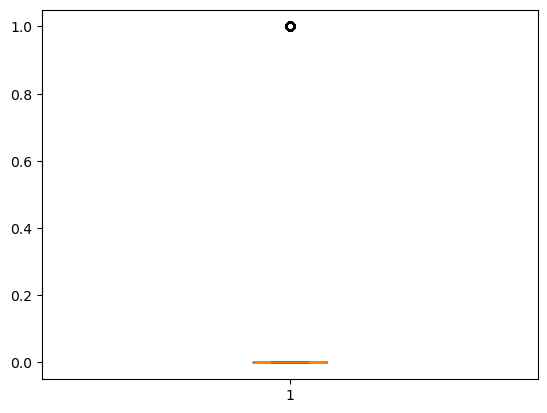

(386, 20)


,default_profile_image,target
98,1,1
139,1,1
198,1,1
267,1,0
325,1,1
...,...,...
26023,1,1
26061,1,1
26077,1,1
26122,1,1


target
1    266
0    120
Name: count, dtype: int64
conducting outliers plot on favourites_count


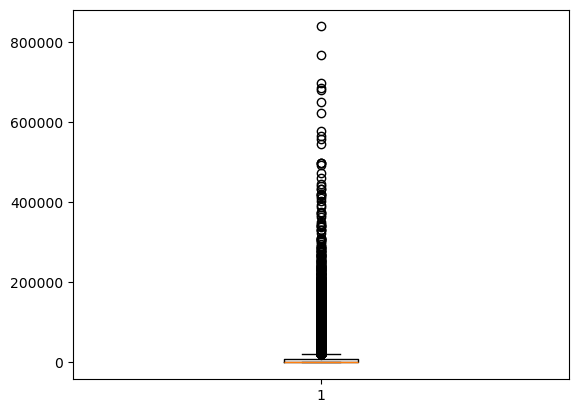

(482, 20)


,favourites_count,target
105,224130,0
162,168675,0
251,622511,1
301,255749,0
416,122284,0
...,...,...
25887,248606,0
25935,197548,0
25936,216594,0
25999,150309,0


target
0    422
1     60
Name: count, dtype: int64
conducting outliers plot on followers_count


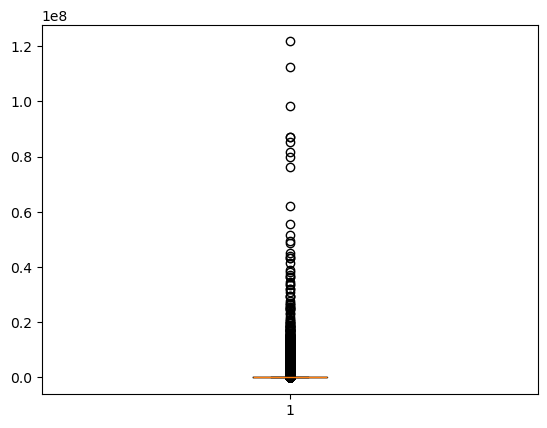

(207, 20)


,followers_count,target
56,15300846,0
85,11685270,0
313,13296340,0
374,12752076,0
460,36480677,0
...,...,...
25539,15712155,0
25587,12383381,1
25704,9517780,0
25815,12493944,0


target
0    189
1     18
Name: count, dtype: int64
conducting outliers plot on friends_count


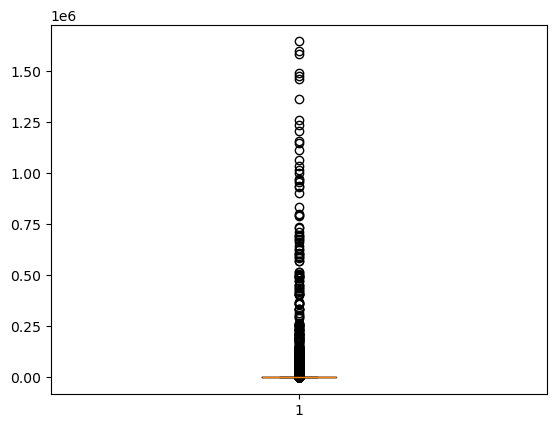

(140, 20)


,friends_count,target
46,1153909,0
251,570524,1
440,799932,0
490,483896,0
770,210496,0
...,...,...
24764,470482,1
24969,489771,1
25634,494967,0
25902,832935,1


target
0    90
1    50
Name: count, dtype: int64
conducting outliers plot on geo_enabled
no outliers
conducting outliers plot on id


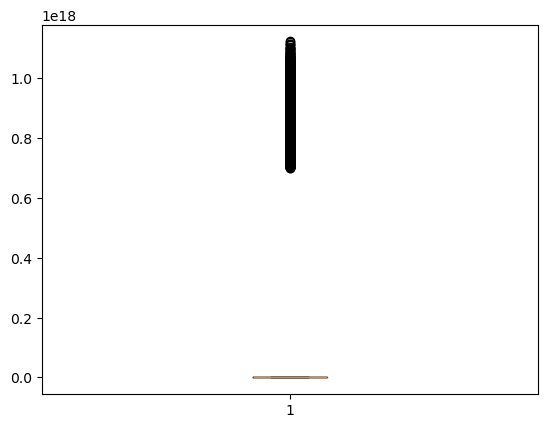

(166, 20)


,id,target
752,1070411120253521922,1
914,1051157340307841029,0
987,1051506601088208896,1
1153,1081252104742756352,1
1264,1059215602563321862,0
...,...,...
25289,1042454529676075008,0
25300,1044202538843672576,1
25312,1046048297008484353,1
25826,1050380044395270144,0


target
0    93
1    73
Name: count, dtype: int64
conducting outliers plot on statuses_count


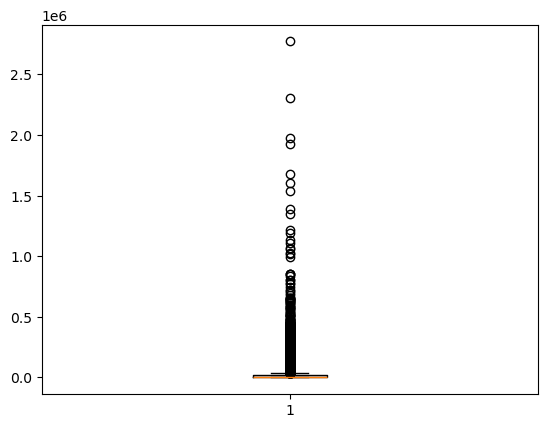

(363, 20)


,statuses_count,target
47,354661,1
211,1066811,1
225,315220,1
249,454835,1
383,288814,1
...,...,...
25781,280711,0
25952,307942,1
26015,433849,1
26075,324873,1


target
1    201
0    162
Name: count, dtype: int64
conducting outliers plot on verified
no outliers
conducting outliers plot on average_tweets_per_day


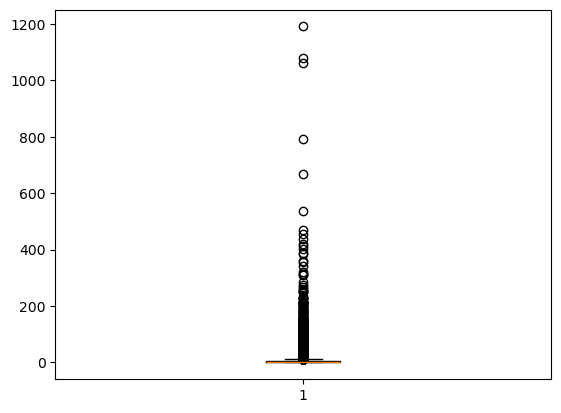

(273, 20)


,average_tweets_per_day,target
47,99.708,1
211,285.091,1
225,92.712,1
249,194.208,1
383,124.920,1
...,...,...
25599,152.477,1
25781,80.571,0
25952,86.940,1
26015,100.755,1


target
1    164
0    109
Name: count, dtype: int64
conducting outliers plot on account_age_days
no outliers


In [131]:
def outliers_check(dataframe , column):
    print(f'conducting outliers plot on {column}')
    #plt.boxplot(dataframe[column])
    #plt.show()
    
    mean = dataframe[column].mean()
    sd = dataframe[column].std()

    threshold = 3
    out_index = abs(dataframe[column] - mean) > threshold * sd
    
    if (dataframe[out_index].shape[0] > 0):
        plt.boxplot(dataframe[column])
        plt.show()
        print(dataframe[out_index].shape)
        display(dataframe[out_index][[column, 'target']])
        print(dataframe[out_index].target.value_counts())
        return out_index, True
    else:
        print("no outliers")
    return [], False

out_index = {}
int_col = ['default_profile',	'default_profile_image',	'favourites_count',	'followers_count',	'friends_count',	'geo_enabled',	'id',	'statuses_count',	'verified',	'average_tweets_per_day',	'account_age_days']
for column in int_col:
    index, check = outliers_check(train, column)
    if (check):
        out_index[column] = index

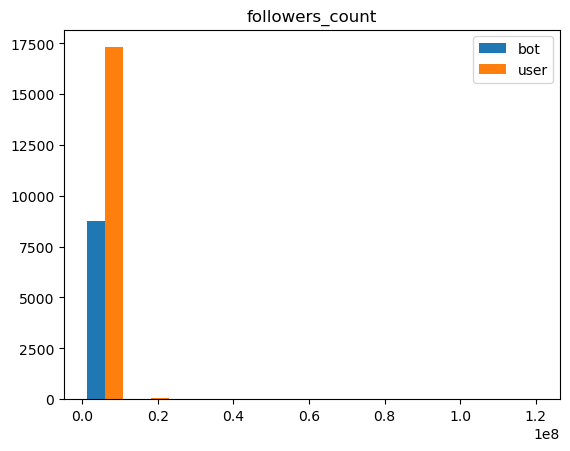

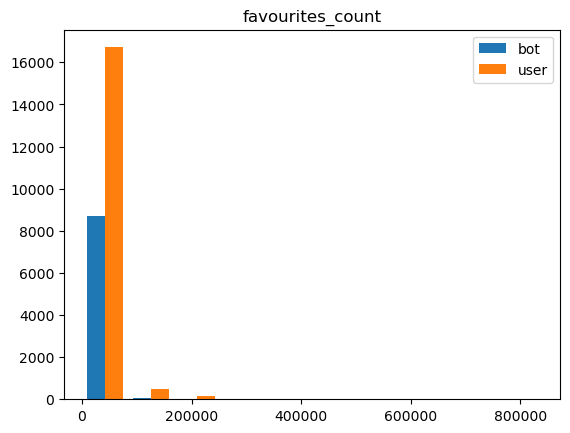

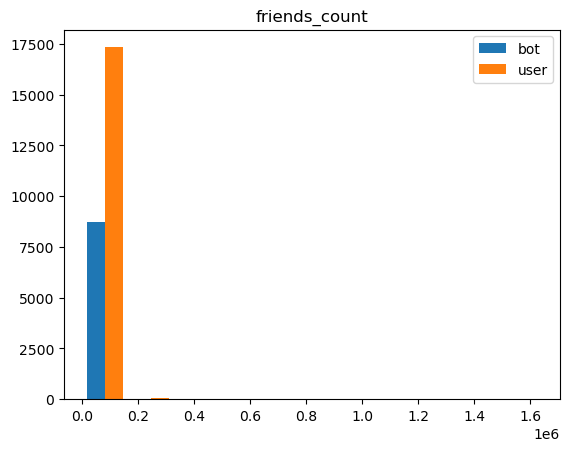

In [132]:
def plot_hist(col):
    '''
    Analyse numerical columns against target column
    '''
    plt.title(col)
    plt.hist([train[train.target == 1][col], train[train.target == 0][col]], label=['bot', 'user'])
    plt.legend()
    plt.show()
    
plot_hist('followers_count')
plot_hist('favourites_count')
plot_hist('friends_count')

In [135]:
corr = train.drop(columns=["created_at", "lang","description", "location", "profile_background_image_url","profile_image_url", "screen_name"]).corr()
corr.style.background_gradient(cmap='coolwarm')

,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,id,statuses_count,verified,average_tweets_per_day,account_age_days,target,num_of_empty_fields
default_profile,1.000000,0.116396,-0.092506,-0.090101,-0.049542,-0.275526,0.315478,-0.136730,-0.267802,-0.086103,-0.460406,0.290762,0.373652
default_profile_image,0.116396,1.000000,-0.033976,-0.017626,-0.011301,-0.094932,0.011780,-0.025537,-0.058401,-0.017599,-0.043003,0.091685,0.203570
favourites_count,-0.092506,-0.033976,1.000000,-0.023298,0.082944,0.139230,-0.051141,0.279463,0.010628,0.300429,0.028906,-0.165032,-0.116299
followers_count,-0.090101,-0.017626,-0.023298,1.000000,0.058818,0.039062,-0.060034,0.032430,0.270720,0.012142,0.118302,-0.085688,-0.050432
friends_count,-0.049542,-0.011301,0.082944,0.058818,1.000000,0.027851,-0.031157,0.084352,0.058792,0.066823,0.047511,0.007315,-0.044762
geo_enabled,-0.275526,-0.094932,0.139230,0.039062,0.027851,1.000000,-0.254024,0.096424,0.198476,0.063227,0.282330,-0.337934,-0.230930
id,0.315478,0.011780,-0.051141,-0.060034,-0.031157,-0.254024,1.000000,-0.092111,-0.192989,-0.025798,-0.736162,0.116478,0.288176
statuses_count,-0.136730,-0.025537,0.279463,0.032430,0.084352,0.096424,-0.092111,1.000000,0.091911,0.938091,0.122694,-0.008857,-0.129822
verified,-0.267802,-0.058401,0.010628,0.270720,0.058792,0.198476,-0.192989,0.091911,1.000000,0.036450,0.350291,-0.313771,-0.246681
average_tweets_per_day,-0.086103,-0.017599,0.300429,0.012142,0.066823,0.063227,-0.025798,0.938091,0.036450,1.000000,0.014656,0.008071,-0.092451


Variables with moderate correlation with target variable are geo_enabled, verified, num_of_empty_fields, year, desc_length, favourites_count

# Data Cleaning

In [139]:
def cleaning_data(df):
    '''
    Purpose: 1) After analysing data, we will fill na columns with empty string, as these na columns means that either it was not filled by users
             2) converting created_at to datetime object
    '''
    df["has_background_img"] = df.profile_background_image_url.notna().astype(int)
    df["has_lang"] = df.lang.notna().astype(int)
    
    df.fillna("", inplace=True)
    df["created_at"] = pd.to_datetime(train['created_at'])
    return df

def process_text(text):
    '''
    Clean text column
    '''
    #find all emoji
    emoji_dict = demoji.findall(text) 
    #replace emoji with words
    no_emoji = " ".join([word if (emoji_dict.get(word,"") == "") else emoji_dict.get(word,"") for word in text.split(" ")])
    
    text_lower = no_emoji.lower()
    tokens = word_tokenize(no_emoji)

    alphabetic_tokens = [word for word in tokens if re.match('^[a-zA-Z]+$', word)]

    # get Stopwords
    stop_words = set(stopwords.words('english'))
    
    # Negation words that should be preserve
    negation_words = ['not', 'no', 'never', "n't", "isn't", "aren't", "wasn't", "weren't", "hasn't", "haven't",
                      "doesn't", "don't", "didn't", "won't", "wouldn't", "shan't", "shouldn't", "mustn't", "can't", "cannot"]
    # remove stopwords and preserving negation words
    tokens_no_stopwords = [word for word in alphabetic_tokens if ((word not in stop_words) or (word in negation_words))]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_no_stopwords]
    processed_text = ' '.join(lemmatized_words)

    return processed_text

# Feature Extraction

In [142]:
def get_desc_sent(row):
    score = sentiment.polarity_scores(row)
    score.pop('compound', None)
    return max( score,  key=score.get)

def split_dates(df):
    '''
    Split date object into their respective components (e.g. day of week, year, month, etc)
    After analysis training data set, year seems to have more correlation with target variable
    '''
    to_update = df.copy()
    to_update["day_of_week"] = to_update.created_at.dt.dayofweek
    to_update["year"] = to_update.created_at.dt.year
    to_update["month"] = to_update.created_at.dt.month
    
    return to_update

def translation(row):
    # transalte cleaned description column
    curr_lang = row["lang"]
    to_eng = row["desc_new"]
    if (curr_lang != "en") & (curr_lang !=""):
        #print(curr_lang)
        try : 
            to_eng = GoogleTranslator(source=curr_lang, target="en").translate(to_eng)
        except:
            #if unable to identify the curr language stated in dataframe, auto detect and translate
            to_eng = GoogleTranslator(source='auto', target="en").translate(to_eng)
    return to_eng

def get_Count(types, row):
    '''
    Function: count type specifed in the row
    Input: String -> represent type of words to count
           row -> represent the row that stores categorised list to count 
           e.g. get_Count('GPE', [(human, GPE)])
    output:
        total -> count of the particular type in the row specified
    '''
    total = 0
    for x in row:
        if x[1] == types:
            total = total+1
    return total

def get_pos_tagging(row):
    if row:
        wordsList = nltk.word_tokenize(row)
        wordsList = [w for w in wordsList if not w in stop_words]
        tagged = nltk.pos_tag(wordsList)
    else:
        return []

    return tagged

def desc_features(df):
    '''
    Cleaning description column (remove stopwords, emojis)
    Extract more features from desc
    '''
    
    to_update = df.copy()
    to_update["desc_length"] = to_update.description.str.len().astype(int)
    '''
    to_update["is_unavailable"] = to_update.description.apply(lambda sentence : 1 if \
                                                              re.findall(".*#account is temporarily unavailable", sentence) != [] else 0) 
    '''
    to_update["desc_new"] = to_update.description.apply(process_text)
    to_update['desc_has_url'] = to_update.description.apply(lambda row : 0 if (len(re.findall(r"\b(?:https|http|www|#URL)", row))> 0) else 1)
    to_update["translated_desc"] = to_update.apply(translation, axis=1)
    to_update.translated_desc = to_update.translated_desc.fillna("")
    
    to_update['desc_sentiment'] = to_update.translated_desc.apply(get_desc_sent)

    #NameEntity feature extraction
    to_update['NER'] = to_update.translated_desc.apply(lambda row : [(word.text,word.label_) for word in NER(row).ents])
    to_update['GPE_count'] = to_update.NER.apply(lambda row : 1 if (get_Count('GPE', row) > 0) else 0)
    to_update['Org_count'] = to_update.NER.apply(lambda row : 1 if (get_Count('ORG', row) > 0) else 0)
    to_update['Loc_count'] = to_update.NER.apply(lambda row : 1 if (get_Count('LOC', row) > 0) else 0)
    to_update['Ordinal_count'] = to_update.NER.apply(lambda row : 1 if (get_Count('ORDINAL', row) > 0) else 0)
    to_update['Money_count'] = to_update.NER.apply(lambda row : 1 if (get_Count('MONEY', row) > 0) else 0)
    to_update['date_count'] = to_update.NER.apply(lambda row : 1 if (get_Count('DATE', row) > 0) else 0)
    to_update['check_NER'] = to_update.NER.apply(lambda row : 1 if row != [] else 0)

    #pos tag feature extraction, possible pos tag that could affect bot detection
    to_update['pos_tagging'] = to_update.translated_desc.apply(lambda row : get_pos_tagging(row))
    to_update['num_noun'] = to_update.pos_tagging.apply(lambda row : 1 if (get_Count('NN', row) > 0)  else 0)
    to_update['num_verb'] = to_update.pos_tagging.apply(lambda row : 1 if (get_Count('VB', row) > 0) else 0)
    to_update['num_NNP'] = to_update.pos_tagging.apply(lambda row : 1 if (get_Count('NNP', row) > 0) else 0)
    to_update['num_RB'] = to_update.pos_tagging.apply(lambda row : 1 if (get_Count('RB', row) > 0) else 0)
    to_update['num_PRP'] = to_update.pos_tagging.apply(lambda row : 1 if (get_Count('PRP', row) > 0) else 0)
    to_update['num_JJ'] = to_update.pos_tagging.apply(lambda row : 1 if (get_Count('JJ', row) > 0) else 0)
    to_update['num_LS'] = to_update.pos_tagging.apply(lambda row : 1 if (get_Count('LS', row) > 0) else 0)
    to_update['num_JJS'] = to_update.pos_tagging.apply(lambda row : 1 if (get_Count('JJS', row) > 0) else 0)
    to_update['num_Unidentified'] = to_update.pos_tagging.apply(lambda row : 1 if get_Count('X', row) > 0 else 0)

    #emojis feature extraction
    to_update['count_emoji'] = to_update.description.apply(lambda row: len(demoji.findall(row)))
    to_update['has_emoji'] = to_update['count_emoji'].apply(lambda row: 1 if row > 0 else 0)

    #hashtag and url extraction
    to_update["hashtag"] = to_update.description.apply(lambda row : len(re.findall(r"#\w+", row)))
    to_update['desc_urlcount'] = to_update.description.apply(lambda row : len(re.findall(r"\b(?:https|http|www|#URL)", row)))
    
    return to_update

In [192]:
def all_methods(df, name):
    '''
    consolidate all cleaning process, feature engineering that has been done for training
    to be applied to testing data
    '''
    #clean null values if exist, and change to date dtype for date column
    df = convert_to_int(df)
    df = cleaning_data(df)
    
    #split the date columns
    df_split = split_dates(df)
    
    #feature extraction on description column
    df_desc = desc_features(df_split)

    #username extraction
    df_desc['username_hasbot'] = df_desc.screen_name.apply(lambda row : 0 if ('bot' not in row.lower()) else 1)

    #numerical features extraction
    df_desc['popularity_ratio'] = df_desc['followers_count'] / (df_desc['friends_count'] + 1)
    df_desc['fren_fav_ratio'] =   df_desc['friends_count'] / (df_desc['favourites_count'] + 1)
    df_desc['fol_fav_ratio'] =  df_desc['followers_count'] / (df_desc['favourites_count']  + 1)
    df_desc['favourites_count_perc'] =  df_desc['average_tweets_per_day'] / (df_desc['favourites_count']  + 1)
    df_desc['status_count_perc'] =  df_desc['statuses_count'] / (df_desc['favourites_count'] + 1)
    df_desc['followers_count_per_year'] = df_desc['followers_count'] / (df_desc.account_age_days + 1)
    df_desc['favourites_count_per_year'] = df_desc['favourites_count'] / (df_desc.account_age_days + 1)
    df_desc['favourites_count_per_year'] = df_desc['friends_count'] / (df_desc.account_age_days + 1)
    
    df_desc.to_csv(f"{name}_more.csv")
    
    return df_desc

test_new_features = all_methods(test, 'test')
train_new_features = all_methods(train, 'train')

C:\Users\qiavo\AppData\Local\Temp\ipykernel_28512\271434404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["has_background_img"] = df.profile_background_image_url.notna().astype(int)
C:\Users\qiavo\AppData\Local\Temp\ipykernel_28512\271434404.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["has_lang"] = df.lang.notna().astype(int)
C:\Users\qiavo\AppData\Local\Temp\ipykernel_28512\271434404.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

# Data Preparation for Machine learning models
- One hot encoding
- word embeddings

In [254]:
df = pd.read_csv("train_more.csv")
test_df =  pd.read_csv("test_more.csv")

In [255]:
encoder = OneHotEncoder(sparse_output=False)
def get_onehot(df_in):

    # Apply one-hot encoding to desc_sentiment
    train_encode_cols = encoder.fit_transform(df_in[['desc_sentiment', 'lang', 'profile_background_image_url']])
    
    train_encoded_df = pd.DataFrame(train_encode_cols, columns=encoder.get_feature_names_out(['desc_sentiment', 'lang', 'profile_background_image_url']))
    
    df_in = pd.concat([df_in.reset_index(drop=True), train_encoded_df], axis=1)
    return df_in

df = get_onehot(df).reset_index(drop=True)
test_df = get_onehot(test_df).reset_index(drop=True)

In [256]:
df.rename(columns={
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme1/bg.png' : 'profile_background_image_url_1',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme10/bg.gif': 'profile_background_image_url_2',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme11/bg.gif': 'profile_background_image_url_3',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme12/bg.gif': 'profile_background_image_url_4',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme13/bg.gif': 'profile_background_image_url_5',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme14/bg.gif': 'profile_background_image_url_6',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme15/bg.png': 'profile_background_image_url_7',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme16/bg.gif': 'profile_background_image_url_8',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme17/bg.gif': 'profile_background_image_url_9',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme18/bg.gif': 'profile_background_image_url_10',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme19/bg.gif': 'profile_background_image_url_11',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme2/bg.gif': 'profile_background_image_url_12',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme20/bg.png': 'profile_background_image_url_13',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme3/bg.gif': 'profile_background_image_url_14',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme4/bg.gif': 'profile_background_image_url_15',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme5/bg.gif': 'profile_background_image_url_16',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme6/bg.gif': 'profile_background_image_url_17',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme7/bg.gif': 'profile_background_image_url_18',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme8/bg.gif': 'profile_background_image_url_19',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme9/bg.gif': 'profile_background_image_url_20'
},inplace=True)

test_df.rename(columns={
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme1/bg.png' : 'profile_background_image_url_1',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme10/bg.gif': 'profile_background_image_url_2',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme11/bg.gif': 'profile_background_image_url_3',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme12/bg.gif': 'profile_background_image_url_4',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme13/bg.gif': 'profile_background_image_url_5',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme14/bg.gif': 'profile_background_image_url_6',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme15/bg.png': 'profile_background_image_url_7',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme16/bg.gif': 'profile_background_image_url_8',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme17/bg.gif': 'profile_background_image_url_9',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme18/bg.gif': 'profile_background_image_url_10',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme19/bg.gif': 'profile_background_image_url_11',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme2/bg.gif': 'profile_background_image_url_12',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme20/bg.png': 'profile_background_image_url_13',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme3/bg.gif': 'profile_background_image_url_14',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme4/bg.gif': 'profile_background_image_url_15',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme5/bg.gif': 'profile_background_image_url_16',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme6/bg.gif': 'profile_background_image_url_17',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme7/bg.gif': 'profile_background_image_url_18',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme8/bg.gif': 'profile_background_image_url_19',
 'profile_background_image_url_http://abs.twimg.com/images/themes/theme9/bg.gif': 'profile_background_image_url_20'
},inplace=True)

In [260]:
df = df.drop(["id", "Unnamed: 0","created_at", "lang", "description", "location", "NER","profile_background_image_url", "profile_image_url", "screen_name", "desc_new", "translated_desc", 'desc_sentiment', 'pos_tagging'], axis=1)
test_df = test_df.drop(["id", "Unnamed: 0", "created_at", "lang","description", "NER", "location", "profile_background_image_url", "profile_image_url", "screen_name", "desc_new", "translated_desc", 'desc_sentiment', 'pos_tagging'], axis=1)

In [262]:
#split independent and dependent variables
def split_X_Y(df):
    X = df.drop("target", axis=1)
    y = df.target
    return X, y

#split dataset for training and validation
from sklearn.model_selection import train_test_split
def split_data(testsize, valsize, X, y):
    #split test dataset
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=testsize,
                                                          stratify=y,
                                                        random_state=30)
    print(X_temp.shape, y_temp.shape)
    return X_temp, X_test, y_temp, y_test


features, target = split_X_Y(df)
X_train, X_val, y_train, y_val = split_data(0.1, 0.2, features, target)

(23585, 119) (23585,)


# Machine Learning

### Random Forest

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=3000, max_features='sqrt', min_samples_leaf=1, max_depth=None)
# Fit the model on the training data
rnd_clf.fit(X_train, y_train)

# Predict probabilities on the validation set
y_pred = rnd_clf.predict_proba(X_val)
print("Validation ROC AUC:", roc_auc_score(y_val, y_pred[:, 1]))
print("Validation Average Precision:", average_precision_score(y_val, y_pred[:, 1]))

In [328]:
rnd_clf = RandomForestClassifier(n_estimators=3000, max_features='sqrt', min_samples_leaf=1, max_depth=None)
# Fit the model on the training data
rnd_clf.fit(df.drop('target', axis=1), df.target)

test_df['lang_pa'] =  0
test_df['lang_zh-tw'] = 0
test_df = test_df[df.drop('target',axis=1).columns]
# Predict probabilities on the validation set
y_pred = rnd_clf.predict_proba(test_df.drop('index', axis=1))
to_output(test_df, y_pred[:,1])

KeyError: "['index'] not found in axis"

In [330]:
y_pred = rnd_clf.predict_proba(test_df)
to_output(test_df, y_pred[:,1])

,index,target
0,0,0.054333
1,1,0.782000
2,2,0.098333
3,3,0.061333
4,4,0.938333
...,...,...
11227,11227,0.263333
11228,11228,0.537667
11229,11229,0.229000
11230,11230,0.005667


In [288]:
xgbm = xgb.XGBClassifier(n_estimators=1500, random_state=42)
xgbm.fit(X_train, y_train)

# Predict probabilities on the validation set
y_pred = xgbm.predict_proba(X_val)
print("Validation ROC AUC:", roc_auc_score(y_val, y_pred[:, 1]))
print("Validation Average Precision:", average_precision_score(y_val, y_pred[:, 1]))

Validation ROC AUC: 0.9354512093280378
Validation Average Precision: 0.9078736168278889


In [252]:
y_pred = rnd_clf.predict_proba(test_df)
to_output(test_df, y_pred[:,1])

,index,target
0,0,0.057
1,1,0.790
2,2,0.095
3,3,0.064
4,4,0.936
...,...,...
11227,11227,0.228
11228,11228,0.549
11229,11229,0.243
11230,11230,0.009


In [210]:
rf = RandomForestClassifier()
param_grid = {
    'max_depth': [3,5,10, None],
    'n_estimators': [1000, 500],
    'max_features': ['sqrt', 'log2' , None],
    'min_samples_leaf': [1, 2, 4]
}

scorer = make_scorer(roc_auc_score, needs_proba=True)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
print("Best AUC score: ", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict_proba(X_val)[:, 1]
auc_test = roc_auc_score(y_val, y_pred)
print(f'Test AUC: {auc_test}')
print(f'Precision: {average_precision_score(y_val, y_pred)}')


Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\qiavo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 1000}
Best AUC score:  0.9409442204301076


NameError: name 'X_test' is not defined

In [171]:
X_train.columns.tolist()

['default_profile',
 'default_profile_image',
 'favourites_count',
 'followers_count',
 'friends_count',
 'geo_enabled',
 'statuses_count',
 'verified',
 'average_tweets_per_day',
 'account_age_days',
 'num_of_empty_fields',
 'has_background_img',
 'has_lang',
 'day_of_week',
 'year',
 'month',
 'desc_length',
 'desc_has_url',
 'hashtag',
 'GPE_count',
 'Org_count',
 'Loc_count',
 'Ordinal_count',
 'Money_count',
 'date_count',
 'check_NER',
 'num_noun',
 'num_verb',
 'num_NNP',
 'num_RB',
 'num_PRP',
 'num_JJ',
 'num_LS',
 'num_JJS',
 'num_Unidentified',
 'count_emoji',
 'has_emoji',
 'desc_urlcount',
 'username_hasbot',
 'popularity_ratio',
 'fren_fav_ratio',
 'fol_fav_ratio',
 'favourites_count_perc',
 'status_count_perc',
 'followers_count_per_year',
 'favourites_count_per_year',
 'desc_sentiment_neg',
 'desc_sentiment_neu',
 'desc_sentiment_pos',
 'lang_af',
 'lang_ar',
 'lang_bg',
 'lang_ca',
 'lang_cs',
 'lang_cy',
 'lang_da',
 'lang_de',
 'lang_el',
 'lang_en',
 'lang_es',
 'la

### LightGBM

## Hyperparameter Tuning

In [ ]:
#for hyparameter tuning
param_grid = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [None, 11, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 5, 10],
    'min_data_in_leaf': [10, 20, 50],
    'feature_fraction': [0.6, 0.8, 1.0],
    'lambda_l1': [0.0, 0.5, 1.0],
    'lambda_l2': [0.0, 0.5, 1.0]
}

lgb_model = lgb.LGBMClassifier(objective='binary', metric='auc', n_estimators=100)
scorer = make_scorer(roc_auc_score, needs_proba=True)

grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best AUC score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_pred)
print(f'Test AUC: {auc_test}')
print(f'Precision: {average_precision_score(y_test, y_pred)}')

lgb.plot_importance(best_model, figsize=(8, 4))
plt.title("Feature Importance - Tuned Model")
plt.show()


[LightGBM] [Info] Number of positive: 7905, number of negative: 15680
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3709
[LightGBM] [Info] Number of data points in the train set: 23585, number of used features: 92
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335171 -> initscore=-0.684891
[LightGBM] [Info] Start training from score -0.684891
[LightGBM] [Info] Number of positive: 6324, number of negative: 12544
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3709
[LightGBM] [Info] Number of data points in the train set: 18868, number of used features: 92
[LightGBM] [Info] Number of positive: 6324, number of negative: 12544
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of test

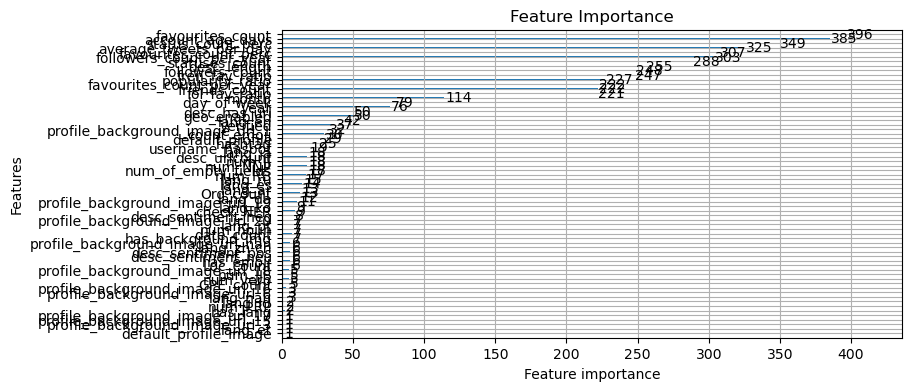

In [234]:
params = {'boosting_type': 'gbdt', 'feature_fraction': 0.6, 'lambda_l1': 1.0, 'lambda_l2': 1.0, 
          'learning_rate': 0.1, 'max_depth': -1, 'min_data_in_leaf': 50, 'num_leaves': 50,
            'objective': 'binary',
            'metric': ['auc','binary_logloss'],
         } #retrieved from grid search

train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

num_round = 100
bst = lgb.train(params, train_data, num_round)
lgb.cv(params, train_data, num_round, nfold=5)


y_pred = bst.predict(X_val, num_iteration=bst.best_iteration)
auc_test = roc_auc_score(y_val,y_pred)
print(f'auc_test is {auc_test}')
print(f'precision:{average_precision_score(y_val,y_pred)}')

# Plot feature importance
lgb.plot_importance(bst, figsize=(8, 4))
plt.title("Feature Importance")
plt.show()

### Bagging

In [188]:
tree_clf = RandomForestClassifier(n_estimators=1500, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_val)

print(f'auc_test is {roc_auc_score(y_val,y_pred_tree)}')
print(f'precision:{average_precision_score(y_val,y_pred_tree)}')

bag_clf = BaggingClassifier(
    RandomForestClassifier(), n_estimators=1500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_val)

print(f'auc_test is {roc_auc_score(y_val,y_pred)}')
print(f'precision:{average_precision_score(y_val,y_pred)}')

auc_test is 0.8457847007947182
precision:0.74378921258905
auc_test is 0.7890050275949224
precision:0.645949311250551


In [189]:
(set(test_df.columns.tolist()).difference(df.columns.tolist())) #check any difference between both dataframe

{'index'}

In [83]:
#match test_df with training dataframe
test_df['lang_pa'] =  0
test_df['lang_zh-tw'] = 0
test_df[df.drop('target',axis=1).columns]

,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,...,profile_background_image_url_12,profile_background_image_url_13,profile_background_image_url_14,profile_background_image_url_15,profile_background_image_url_16,profile_background_image_url_17,profile_background_image_url_18,profile_background_image_url_19,profile_background_image_url_20,profile_background_image_url_nan
0,0,0,22290,163813,1746,1,42013,1,8.586,4893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,685,44,637,0,111,0,0.041,2699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,12257,276,194,1,18142,0,4.390,4133,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,30806,1124,4999,1,20624,0,5.627,3665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,224,22,265,0,64,0,0.032,1996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,0,0,16886,1973,238,1,132560,0,36.318,3650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11228,1,0,0,4263,0,0,1,0,0.001,1059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11229,0,0,1530,367,245,0,11355,0,2.896,3921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11230,0,0,1460,425666,540,0,2549,1,0.626,4072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Get output for test_df

In [93]:
params = {'boosting_type': 'gbdt', 'feature_fraction': 0.6, 'lambda_l1': 1.0, 'lambda_l2': 1.0, 
          'learning_rate': 0.1, 'max_depth': -1, 'min_data_in_leaf': 50, 'num_leaves': 50,
            'objective': 'binary',
            'metric': ['auc','binary_logloss'],
         }

train_data = lgb.Dataset(df.drop('target',axis=1), label=df.target)
val_data = lgb.Dataset(X_val, label=y_val)
#test_data = lgb.Dataset(X_test, label=y_test, weight=w2)

num_round = 100
bst = lgb.train(params, train_data, num_round)
lgb.cv(params, train_data, num_round, nfold=5)


y_pred = bst.predict(test_df.drop('index', axis=1), num_iteration=bst.best_iteration)

[LightGBM] [Info] Number of positive: 8783, number of negative: 17423
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3712
[LightGBM] [Info] Number of data points in the train set: 26206, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335152 -> initscore=-0.684973
[LightGBM] [Info] Start training from score -0.684973
[LightGBM] [Info] Number of positive: 7026, number of negative: 13938
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3712
[LightGBM] [Info] Number of data points in the train set: 20964, number of used features: 93
[LightGBM] [Info] Number of positive: 7026, number of negative: 13939
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of test

In [240]:
def to_output(test_Emb, y_pred_test):
    out = pd.DataFrame({ 'index': test_Emb.index , 'target': y_pred_test})
    out.to_csv("output.csv", index=False)
    return out

In [97]:
to_output(test_df, y_pred)

,index,target
0,0,0.031909
1,1,0.900631
2,2,0.068501
3,3,0.025642
4,4,0.990171
...,...,...
11227,11227,0.135680
11228,11228,0.457354
11229,11229,0.087863
11230,11230,0.002719
